In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('train.csv')

In [12]:
t_df = pd.read_csv('test.csv')

In [13]:
t_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [4]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
df.isna().mean()

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64

In [8]:
df['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [9]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [14]:
t_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

In [17]:
df['Gender'] = le.fit_transform(df['Gender'])
t_df['Gender'] = le.transform(t_df['Gender'])

In [18]:
df['Vehicle_Age'] = le.fit_transform(df['Vehicle_Age'])
t_df['Vehicle_Age'] = le.transform(t_df['Vehicle_Age'])

In [19]:
df['Vehicle_Damage'] = le.fit_transform(df['Vehicle_Damage'])
t_df['Vehicle_Damage'] = le.transform(t_df['Vehicle_Damage'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int32  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int32  
 7   Vehicle_Damage        381109 non-null  int32  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int32(3), int64(6)
memory usage: 30.5 MB


In [28]:
import matplotlib.pyplot as plt

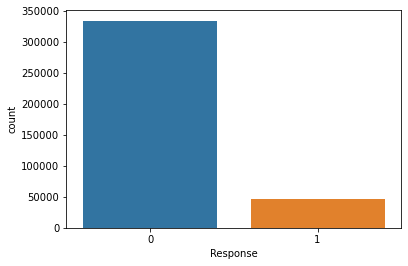

In [34]:
import seaborn as sns
sns.countplot(x='Response',data=df)
plt.show()

In [35]:
df['Response'].value_counts(normalize=True)*100

0    87.743664
1    12.256336
Name: Response, dtype: float64

In [37]:
ext = df[df['Response'] == 1]

In [41]:
train_final = pd.concat([df,ext,ext,ext,ext,ext,ext])

In [42]:
train_final['Response'].value_counts(normalize=True)*100

0    50.561638
1    49.438362
Name: Response, dtype: float64

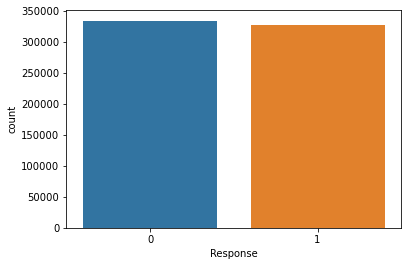

In [43]:
import seaborn as sns
sns.countplot(x='Response',data=train_final)
plt.show()

In [60]:
dff.corr().round(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.0,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.0,-0.00
Gender,0.0,1.00,0.13,-0.01,-0.00,-0.09,-0.07,0.10,0.01,-0.09,-0.0,0.08
Age,0.0,0.13,1.00,-0.06,0.04,-0.26,-0.35,0.27,0.09,-0.52,-0.0,0.18
Driving_License,0.0,-0.01,-0.06,1.00,0.00,0.00,0.02,-0.00,-0.01,0.03,0.0,0.02
Region_Code,0.0,-0.00,0.04,0.00,1.00,-0.02,-0.02,0.03,-0.00,-0.04,-0.0,0.02
Previously_Insured,0.0,-0.09,-0.26,0.00,-0.02,1.00,0.17,-0.85,-0.01,0.23,0.0,-0.59
Vehicle_Age,-0.0,-0.07,-0.35,0.02,-0.02,0.17,1.00,-0.17,0.05,0.23,0.0,-0.15
Vehicle_Damage,-0.0,0.10,0.27,-0.00,0.03,-0.85,-0.17,1.00,0.03,-0.24,-0.0,0.59
Annual_Premium,0.0,0.01,0.09,-0.01,-0.00,-0.01,0.05,0.03,1.00,-0.16,0.0,0.03
Policy_Sales_Channel,0.0,-0.09,-0.52,0.03,-0.04,0.23,0.23,-0.24,-0.16,1.00,0.0,-0.21


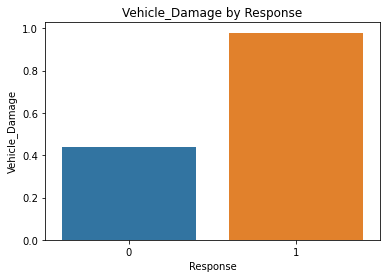

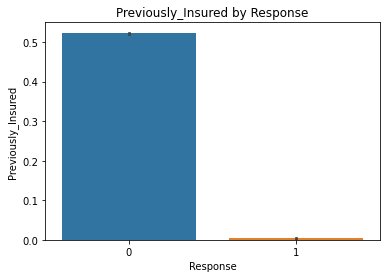

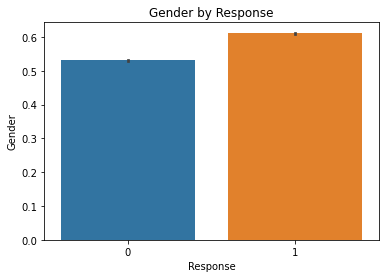

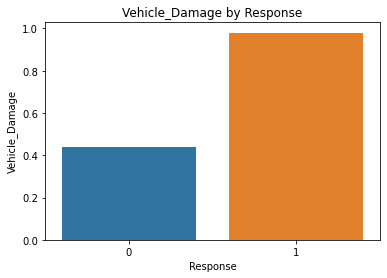

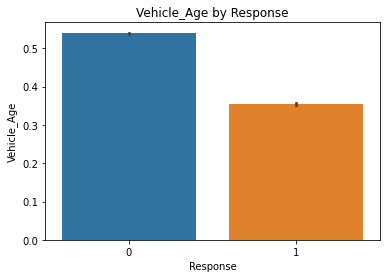

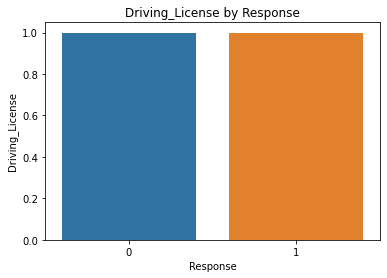

In [63]:
   
cat_features = dff[[ 'Vehicle_Damage', 'Previously_Insured', 'Gender','Vehicle_Damage', 'Vehicle_Age', 'Driving_License']].columns
for i in cat_features:
    sns.barplot(x="Response",y=i,data=dff)
    plt.title(i+" by "+"Response")
    plt.show()

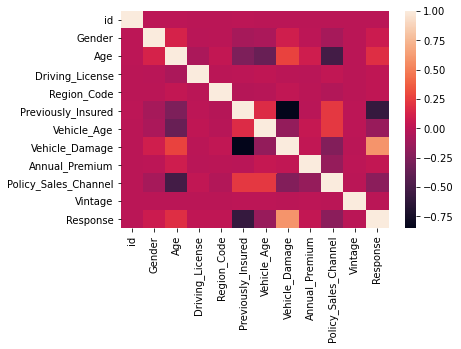

In [61]:
sns.heatmap(dff.corr())

In [48]:
dff = train_final

In [51]:
X = dff.drop(['Response','id'],axis = 1)
y = dff['Response']

In [52]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)

In [55]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(443117, 10) (218252, 10) (443117,) (218252,)


In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lr = LogisticRegression().fit(x_train,y_train)

In [58]:
lr.score(x_test,y_test)

0.7760845261440903

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dt = DecisionTreeClassifier().fit(X,y)

In [69]:
dt.score(x_test,y_test)

0.9373476531715631

In [73]:
dt.feature_importances_

array([0.01634528, 0.09562209, 0.00060174, 0.07375094, 0.03236025,
       0.00678331, 0.3515409 , 0.18643439, 0.03687604, 0.19968507])

In [75]:
X.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

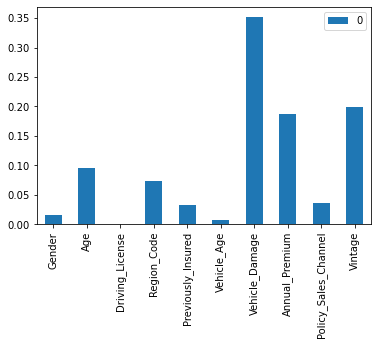

In [80]:
pd.DataFrame(dt.feature_importances_,index=['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured','Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium','Policy_Sales_Channel', 'Vintage']).plot.bar()

In [82]:
X_new = X.drop(['Gender','Driving_License','Vehicle_Age'],axis = 1)

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
sc = StandardScaler()

In [85]:
x_train,x_test,y_train,y_test = train_test_split(X_new,y,test_size = 0.33,random_state = 42)

In [86]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [87]:
x_train

array([[ 0.01447324, -1.86186122, -0.60117341, ..., -1.59097797,
         0.90400811,  0.6440758 ],
       [-1.02927365,  1.14362968,  1.66341355, ..., -1.59097797,
         0.8682108 ,  0.4288979 ],
       [ 0.22322262,  0.11543542, -0.60117341, ...,  0.58362307,
        -1.38701959,  1.62433069],
       ...,
       [ 1.05822013,  0.66907848, -0.60117341, ...,  0.57846001,
         0.36704849,  1.71996531],
       [-1.30760616, -1.94095309, -0.60117341, ..., -0.68031573,
         0.8682108 , -0.93389549],
       [-0.95969053,  0.82726222, -0.60117341, ..., -0.35010457,
         0.8682108 , -0.32422476]])

In [88]:
x_test

array([[-0.82052427,  1.61818087, -0.60117341, ..., -0.55101483,
         0.8682108 , -1.61529218],
       [-0.47260864,  1.14362968, -0.60117341, ..., -1.59097797,
         1.06509599,  1.09834026],
       [ 0.15363949,  0.19452729,  1.66341355, ..., -0.45128926,
         0.36704849,  0.01049642],
       ...,
       [ 0.15363949,  0.35271102, -0.60117341, ..., -1.59097797,
         0.93980542, -1.17298205],
       [ 0.43197199,  0.11543542, -0.60117341, ...,  1.70787872,
        -1.38701959,  0.70384744],
       [ 0.64072137,  0.11543542,  1.66341355, ...,  0.1936439 ,
         0.36704849,  1.06247728]])

In [89]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

In [90]:
dt = DecisionTreeClassifier(random_state=42).fit(x_train,y_train)

In [91]:
dt.score(x_test,y_test)

0.9367795025933324

In [93]:
dt_pred = dt.predict(x_test)

In [92]:
from sklearn.metrics import roc_auc_score

In [96]:
print('DT_Score :',roc_auc_score(y_test,dt_pred))

DT_Score : 0.9373898413011741


In [99]:
#################

In [100]:
forest = RandomForestClassifier(random_state=42).fit(x_train,y_train)
forest.score(x_test,y_test)

0.9361930245770944

In [102]:
forest_pred = forest.predict(x_test)
print('Forest_Score :',roc_auc_score(y_test,forest_pred))

Forest_Score : 0.9368103611399967


In [103]:
grad = GradientBoostingClassifier().fit(x_train,y_train)
grad_pred = grad.predict(x_test)
grad.score(x_test,y_test)

0.7974726462987739

In [107]:
print('GradientBoosting_Score :',roc_auc_score(y_test,grad_pred))

GradientBoosting_Score : 0.798742713588155


In [105]:
ada = AdaBoostClassifier().fit(x_train,y_train)
ada_pred = ada.predict(x_test)

In [106]:
ada.score(x_test,y_test)

0.7955940839030112

In [108]:
print('AdaBoost_Score :',roc_auc_score(y_test,ada_pred))

AdaBoost_Score : 0.7969899630043213


In [110]:
xgb = XGBClassifier().fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)

In [111]:
xgb.score(x_test,y_test)

0.7967991129520005

In [112]:
print('xgb_Score :',roc_auc_score(y_test,xgb_pred))

xgb_Score : 0.7981134796365676


In [113]:
####################################################################################

In [116]:
t_df = t_df[X_new.columns]

In [118]:
scc = StandardScaler().fit(X_new)

In [119]:
X_new_sc = scc.transform(X_new)
t_sc = scc.transform(t_df)

In [120]:
X_new_sc

array([[ 0.22420774,  0.11493193, -0.60118336, ...,  0.52959715,
        -1.3868506 ,  0.74973309],
       [ 2.4505383 , -1.86304988, -0.60118336, ...,  0.14185855,
        -1.3868506 ,  0.34351778],
       [ 0.43292623,  0.11493193, -0.60118336, ...,  0.40853393,
        -1.3868506 , -1.52029367],
       ...,
       [ 0.3633534 ,  0.11493193, -0.60118336, ...,  0.20939614,
         0.36709017,  0.15235763],
       [ 1.40694585,  0.11493193, -0.60118336, ...,  0.72133664,
        -1.3868506 , -0.18217263],
       [-0.19322924,  0.11493193, -0.60118336, ...,  1.21831238,
        -1.3868506 ,  0.12846261]])

In [121]:
t_sc

array([[-1.09767603, -1.2300957 ,  1.66338603, ...,  0.26796608,
         0.8682161 , -1.20965843],
       [-0.05408358,  0.11493193, -0.60118336, ...,  0.15452535,
        -1.72690034, -0.51670289],
       [ 0.43292623,  0.11493193, -0.60118336, ...,  0.50695385,
         0.36709017,  0.53467792],
       ...,
       [-1.37596734,  1.53907884,  1.66338603, ..., -0.06742389,
         0.8682161 , -0.95876073],
       [ 2.10267415,  0.11493193,  1.66338603, ...,  1.78624462,
        -1.3868506 ,  1.32321353],
       [ 0.01548925,  0.1940512 ,  1.66338603, ..., -0.17251349,
         0.36709017,  0.91699822]])

In [122]:
dtt = DecisionTreeClassifier(random_state=42).fit(X_new_sc,y)

In [123]:
pred = dtt.predict(t_sc)

In [124]:
pd.Series(pred).to_csv('Prediction.csv')

In [126]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661369 entries, 0 to 381097
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   661369 non-null  int64  
 1   Region_Code           661369 non-null  float64
 2   Previously_Insured    661369 non-null  int64  
 3   Vehicle_Damage        661369 non-null  int32  
 4   Annual_Premium        661369 non-null  float64
 5   Policy_Sales_Channel  661369 non-null  float64
 6   Vintage               661369 non-null  int64  
dtypes: float64(3), int32(1), int64(3)
memory usage: 57.8 MB


In [127]:
X_new.head()

,Age,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,44,28.0,0,1,40454.0,26.0,217
1,76,3.0,0,0,33536.0,26.0,183
2,47,28.0,0,1,38294.0,26.0,27
3,21,11.0,1,0,28619.0,152.0,203
4,29,41.0,1,0,27496.0,152.0,39


In [130]:
X_new.Policy_Sales_Channel.nunique()

155